# **Customer Churn Prediction**

### **Business Problem**

About:
Customer Churn is defined when a customer chooses to stop using the products or services of an organization. Every churn has a direct impact on company operations (revenues, costs, profit, etc.).

Business Need: Implement a strategy for tracking customer journey, identifying patterns related to churn, predicting who is likely to churn, take pre-emptive actions to prevent future churns.

### **Dataset Overview**

* State: The state of residence for the customer
* Account length: The duration (in months) that the customer has had an account.
* Area code: The area code of the customer's phone number.
* International plan: Whether the customer has an international calling plan (yes/no).
* Voice mail plan: Whether the customer has a voice mail plan (yes/no).
* Number vmail messages: The number of voice mail messages the customer has.
* Total day minutes: The total number of minutes the customer used during the day.
* Total day calls: The total number of calls the customer made during the day.
* Total day charge: The total charges for the customer's day calls.
* Total eve minutes: The total number of minutes the customer used during the evening.
* Total eve calls: The total number of calls the customer made during the evening.
* Total eve charge: The total charges for the customer's evening calls.
* Total night minutes: The total number of minutes the customer used during the night.
* Total night calls: The total number of calls the customer made during the night.
* Total night charge: The total charges for the customer's night calls.
* Total intl minutes: The total number of international minutes used by the customer.
* Total intl calls: The total number of international calls made by the customer.
* Total intl charge: The total charges for the customer's international calls.
* Customer service calls: The number of calls the customer made to customer service.
* Churn: Whether the customer churned (left the service) or not (yes/no).

## **Import Data and Data Identification**

***Data Train***

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Reading CSV Files from the Data Train Stored in Google Drive
import pandas as pd
path = "/content/drive/MyDrive/challenge2/Data Train.csv"
train = pd.read_csv(path)

In [3]:
# Displaying the First 5 Rows of the Data Train
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
# Showing the Number of Rows and Columns in the Data Train
train.shape

(4250, 20)

In [6]:
# Displaying Detailed Information About the Data Train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

***Data Test***

In [7]:
# Reading CSV Files from the Data Train Stored in Google Drive
import pandas as pd
path = "/content/drive/MyDrive/challenge2/Data Test.csv"
test = pd.read_csv(path)

In [8]:
# Displaying the First 5 Rows of the Data Test
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [9]:
# Showing the Number of Rows and Columns in the Data Test
test.shape

(750, 20)

In [10]:
# Displaying Detailed Information About the Data Test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

## ***Exploratory Data Analysis (EDA)***

***Separating Variables (Categorical and Numerical)***

In [11]:
# Displaying Feature Names in Two Categories: Categorical and Numerical in the Data Train
categorical = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
numerical = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

print("Categorical Kolom:")
for cat_feature in categorical:
    print(cat_feature)

print("\nNumerical Kolom:")
for num_feature in numerical:
    print(num_feature)

Categorical Kolom:
state
area_code
international_plan
voice_mail_plan
churn

Numerical Kolom:
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls


***Cek Missing Value pada Data Train dan Data Test***

In [12]:
# Missing Value in Data Train
train.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [13]:
# Missing Value in Data Test
test.isnull().sum()

,0
id,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0


***Visualisasi Simple Plot***

In [14]:
# Importing Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

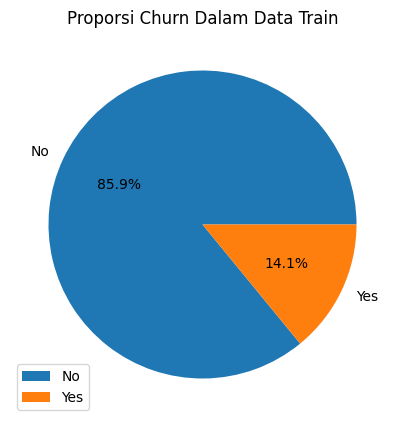

In [15]:
# Displaying Churn Proportions in the Data Train
y=train['churn'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Proporsi Churn Dalam Data Train')
plt.show()

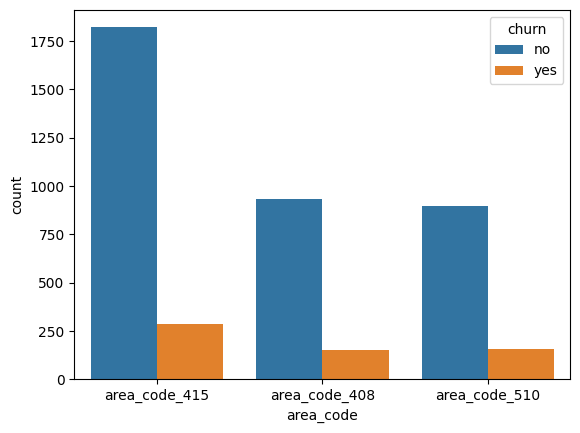

In [16]:
# Displaying Categories in the "area_code" Feature, Segmented by the "churn" Category
sns.countplot( data=train, x="area_code", hue='churn');

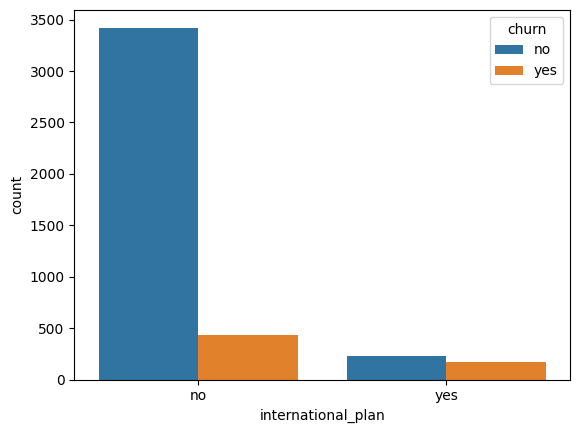

In [17]:
# MDisplaying Categories in the "international_plan" Feature, Segmented by the "churn" Category
sns.countplot( data=train, x="international_plan", hue='churn');

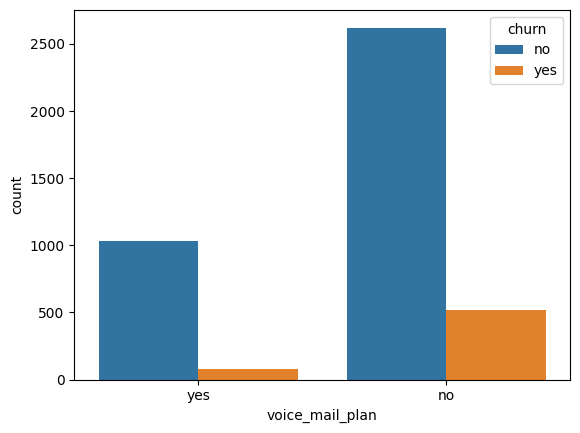

In [18]:
# Displaying Categories in the "voice_mail_plan" Feature, Segmented by the "churn" Category
sns.countplot( data=train, x="voice_mail_plan", hue='churn');

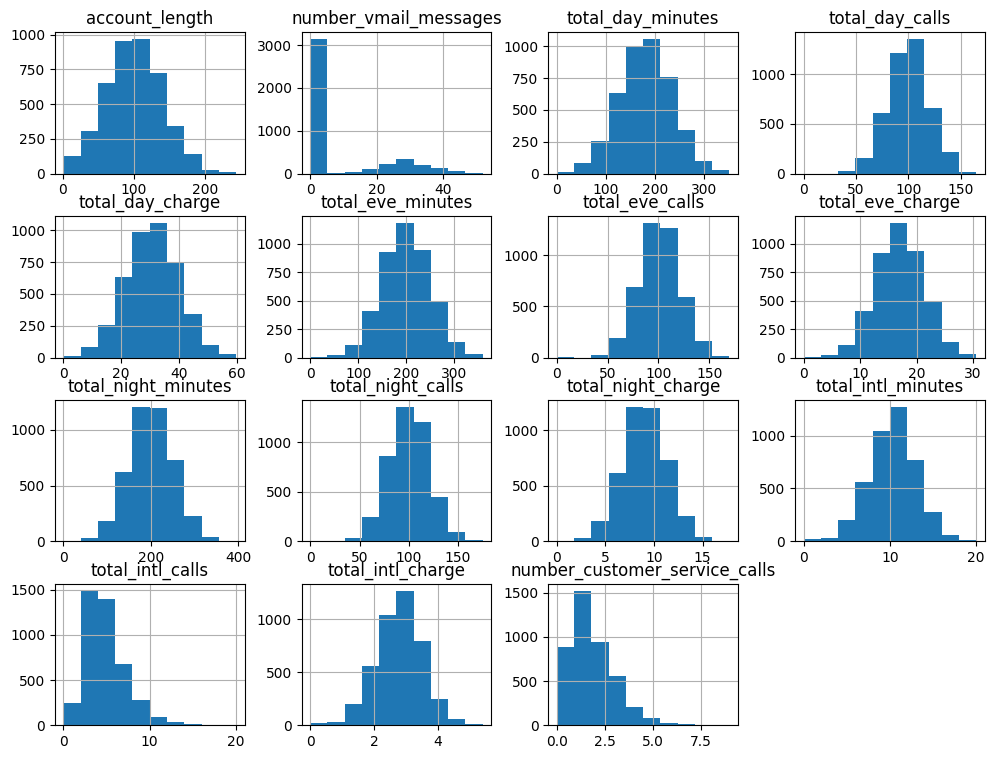

In [19]:
# Creating Histograms for Each Numerical Feature in the Data Train
train.hist(figsize=(12, 9))
plt.show()

## **Data Pre Processing**

***Duplicated Data***

In [20]:
# Checking for Duplicate Data in the Data Train
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4245,False
4246,False
4247,False
4248,False


In [21]:
# Checking for Duplicate Data in the Data Test
test.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
745,False
746,False
747,False
748,False


***Drop target variable***

In [22]:
# Removing Columns state, account_length, and area_code from the Data Train
train = train.drop(['state', 'account_length', 'area_code'], axis = 1)
train

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [23]:
# Removing Columns state, account_length, and area_code from the Data Test
test = test.drop(['state', 'account_length', 'area_code'], axis = 1)
test

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


***Mapping***

In [24]:
# Mapping in Data Train
train['voice_mail_plan'] = train['voice_mail_plan'].map({'yes': 1, 'no': 0})
train['international_plan'] = train['international_plan'].map({'yes': 1, 'no': 0})
train['churn'] = train['churn'].map({'yes': 1, 'no': 0})
train

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [25]:
# Mapping in Data Test
test['voice_mail_plan'] = test['voice_mail_plan'].map({'yes': 1, 'no': 0})
test['international_plan'] = test['international_plan'].map({'yes': 1, 'no': 0})
test

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


***Outliers Z-score***

In [26]:
# Outliers in Data Train
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls' ]:
    zscore = abs(stats.zscore(train[col]))
    filtered_entries = (zscore < 3) & filtered_entries

train_rm_outlier = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(train_rm_outlier)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 4041


In [27]:
# Outliers in Data Test
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(test)}')

filtered_entries = np.array([True] * len(test))
for col in ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls' ]:
    zscore = abs(stats.zscore(test[col]))
    filtered_entries = (zscore < 3) & filtered_entries

test_rm_outlier = test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(test_rm_outlier)}')

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah memfilter outlier: 709


## **Modeling**

In [28]:
# Splitting the Dataset into Two Parts: Independent Variables (X) and Dependent Variable (y)
X = train_rm_outlier.drop('churn', axis=1)
y = train_rm_outlier['churn']

In [29]:
# Dividing the Dataset into Four Different Subsets: Two Subsets for Independent Variables (Features) and Two Subsets for Dependent Variables (Targets)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [30]:
# Melakukan evaluasi model menggunakan validasi silang dengan algoritma Decision Tree dan Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

***Decision Tree***

In [31]:
# Evaluating the Model Using Cross-Validation with Decision Tree and Random Forest Classifier Algorithms
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.9308642  0.91584158 0.92326733 0.93564356 0.93564356 0.88613861
 0.93564356 0.93564356 0.92079208 0.92821782]


In [32]:
# Average Score
score.mean()

0.9247695880699182

In [33]:
# Training the Decision Tree Classifier Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Creating a Model Evaluation Function
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

***Hasil akurasi Decision Tree***

In [35]:
# Evaluating the Performance of the Decision Tree Classifier Model
evaluasi_model(clf, X_test, y_test)

0.9208573784006595

***Random Forest***

In [36]:
# K-Fold Cross-Validation with Random Forest Classifier Algorithm Using Accuracy Score as the Evaluation Metric
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

rf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.92592593 0.91089109 0.91584158 0.93564356 0.94306931 0.89108911
 0.93316832 0.94059406 0.93069307 0.92326733]


In [37]:
# Average Score
score.mean()

0.9250183351668502

In [38]:
# Training the Random Forest Classifier Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

***Hasil akurasi Random Forest***

In [39]:
# Evaluating the Performance of the Random Forest Classifier Model
evaluasi_model(rf, X_test, y_test)

0.9546578730420445

## **Prediction**

In [40]:
# Displaying the First 5 Rows of the Data Test
test.head()

,id,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [41]:
# Removing the id Column from the Data Test
test = test.drop(['id'], axis = 1)
test

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [42]:
# Training the Decision Tree Classifier Model
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [43]:
# Displaying Predictions
prediction = clf.predict(test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
df_test = pd.read_csv("/content/drive/MyDrive/challenge2/Data Test.csv")
submission = pd.DataFrame({"id": df_test["id"],
                           "churn": prediction
                        })
submission.head()

,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [45]:
submission.to_csv("submit.csv", index = False)

In [46]:
# Adding Prediction Results Column from the Submission DataFrame to the Test DataFrame
test['churn'] = submission['churn']
test.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
